### собственные векторы и числа

In [1]:
# Найдите собственные числа и собственные вектора матрицы

import numpy as np

# создаем матрицу А
A = np.array([
    [3, 1],
    [2, 2]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [4. 1.]
Собственные векторы: 
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [2]:
# Найдите собственные числа матрицы

# создаем матрицу А
A = np.array([
    [1, -5, -6],
    [4, 8, 7],
    [5, 9, 11]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [13.59373746  5.03209301  1.37416954]
Собственные векторы: 
 [[ 0.45145779  0.83661458  0.10258363]
 [ 0.62348353  0.44632316 -0.77299039]
 [ 0.63832135  0.31760303  0.62606905]]


In [3]:
# Найти собственные числа матрицы:
# Видно, что матрица A будет заведомо вырожденной, так как её третья строка — это результат вычитания первой строки из второй строки. Посмотрим, как поведут себя собственные числа:

# создаем матрицу А
A = np.array([
    [1, -4, -5, -6],

    [4, 12, 8, 7],

    [5, 14, 9, 11],
    [8, 15, 7, 4]

]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [ 2.54687092e+01  1.53129080e+00 -2.32317465e-14 -1.00000000e+00]
Собственные векторы: 
 [[-0.33176532 -0.6739195   0.5479715  -0.5312532 ]
 [-0.75622544 -0.67703635  0.72006173 -0.64930947]
 [-0.42446012 -0.00311685 -0.00452869 -0.11805627]
 [-0.37133334  0.2957103  -0.42569687  0.5312532 ]]


In [4]:
# Найти собственные числа матрицы
# Из теоретической части мы знаем, что у данной матрицы собственных чисел нет. Но давайте посмотрим, что по этому поводу думает Python:

# создаем матрицу А
A = np.array([
    [0, 1],
    [-1, 0],
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [0.+1.j 0.-1.j]
Собственные векторы: 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [5]:
# А пока посмотрим на то, как найти спектр корреляционной матрицы на реальной задаче. 
# Возьмём знакомый нам классический датасет о домах в Бостоне. 

from sklearn import datasets 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# загружаем датасет
boston = datasets.load_boston()
#print(boston['DESCR'])
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
boston_data['PRICE']=boston.target
boston_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [6]:
# Составим матрицу наблюдений, в которую войдут все исходные факторы и вектор целевой переменной: 

A = boston_data.drop('PRICE', axis=1)
y = boston_data[['PRICE']]

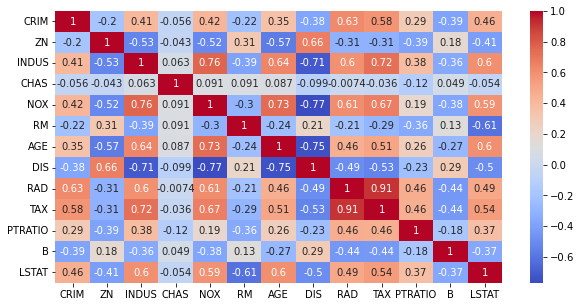

In [7]:
# Затем составим корреляционную матрицу для исходных факторов:

C = A.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(C, annot=True, cmap='coolwarm');

In [8]:
# А теперь найдём собственные числа полученной корреляционной матрицы:

# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(C)
print('Собственные числа: \n', eig_values)
#print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


Так как корреляционная матрица диагональная, то её собственные числа всегда действительны и различны между собой. Это мы и наблюдаем. 

In [9]:
# Проверим, что все собственные векторы корреляционной матрицы ортогональны друг другу. 
# Это свойство понадобится нам в методе главных компонент.

# считаем матрицу Грамма L^T*L:
print(np.round(eig_vectors.T @ eig_vectors, 2))

[[ 1. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0.]
 [-0.  1.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.]
 [ 0.  0.  1.  0. -0. -0.  0.  0.  0. -0.  0. -0. -0.]
 [ 0.  0.  0.  1.  0.  0.  0. -0.  0.  0.  0. -0. -0.]
 [ 0.  0. -0.  0.  1.  0. -0. -0.  0.  0.  0. -0. -0.]
 [ 0. -0. -0.  0.  0.  1. -0.  0.  0.  0.  0. -0.  0.]
 [-0.  0.  0.  0. -0. -0.  1.  0. -0.  0. -0. -0. -0.]
 [ 0. -0.  0. -0. -0.  0.  0.  1.  0. -0.  0. -0. -0.]
 [-0. -0.  0.  0.  0.  0. -0.  0.  1. -0. -0.  0.  0.]
 [ 0. -0. -0.  0.  0.  0.  0. -0. -0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  1. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  1.  0.]
 [ 0. -0. -0. -0. -0.  0. -0. -0.  0.  0. -0.  0.  1.]]


Мы получили единичную матрицу, а значит, собственные вектора ортогональны друг другу. Мы доказали ещё одно свойство собственных чисел для диагональных матриц.

###  Задание 4.1
Найдите собственные числа для матрицы

In [12]:
# создаем матрицу А
A = np.array([
    [1, 4, 13],
    [3, -4, 7],
    [5, 9, 12]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', np.round(eig_values, 0))

Собственные числа: 
 [20. -4. -7.]


###  Задание 4.2
Найдите собственные числа матрицы Грама 

In [13]:
# создаем матрицу А
A = np.array([
    [1, 9, 4],
    [9, 4, 7],
    [4, 7, 12]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A.T@A)
print('Собственные числа: \n', np.round(eig_values, 0))

Собственные числа: 
 [391.  46.  16.]
